In [1]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
import datetime

Fonctions personnalisées :

In [2]:
def recap(df):
    return pd.concat([df.describe(include='all'), df.dtypes.to_frame(name='type').T])

In [3]:
#on créer une fonction qui renvoie un dataframe contenant les différentes modalités d'une colonne ainsi que le nombre de fois
#qu'elles apparaissent ainsi que leur fréquence d'apparition
def moda(df,col):
    eff = df[col].value_counts() #on comptes le nombre de valeurs dans la colonne
    moda = eff.index #on récupères les modalités que prends la variable

    tabModa = pd.DataFrame(moda, columns = [col]) #on crée un DataFrame avec toutes les modalités de la variable
    tabModa["n"] = eff.values #On ajoute une colonne au DataFrame contenant le nombre d'occurence de la modalité
    tabModa["f"] = tabModa["n"]/sum(tabModa["n"])*100 #on ajoute une colonne au DataFrame colculant la fréquence d'apparition de la modalité
    return tabModa

# fonction qui renvoies le nb de données manquantes d'une colonne d'un dataframe ainsi que sa fréquence
def nbNaCol(df, col):
    size=df[df[col].isna()==True].shape
    return size[0], size[0]/len(df)*100

def pieplot(df,col):
    return plt.pie(df["n"], labels=df[col], explode=[0.1]*len(df), normalize = True, autopct="%.1f%%")

def diagbar(df,col):
    plt.figure(figsize=(10,5))
    bp=sns.barplot(x=df[col],y=df['f'],palette='Spectral')
    bp.set_xticklabels(labels=df[col],rotation=90)
    plt.show()

def nbinsYule(d):
    return int(2.5*(len(d.isna()==False))**(1/4))

def chunk(string):
    size=4
    chunks=[string[i:i+4] for i in range(0, len(string), size)]
    res=''
    for j in range(0,len(chunks)):
        if j == len(chunks)-1:
            res = res+chunks[j]
        else:
            res = res+chunks[j]+','
    return res

def hist_comp(df,col):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,5))
    sns.histplot(data=df[col],bins=nbinsYule(df[col]), kde=True, ax=axes[0])
    axes[0].set_title("Données initiales", color='#2cb7b0')
    sns.histplot(data=np.log(df[col][df[col]>0]), kde=True, ax=axes[1])
    axes[1].set_title("Application du logarithme", color='#2cb7b0')
    title="Distribution de "+col+" avec changement d'échelle"
    plt.suptitle(title, fontsize=12)
    plt.show()

In [4]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Chargement des données

In [5]:
data_2015 = pd.read_csv("Data/2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("Data/2016-building-energy-benchmarking.csv")

In [6]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [7]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
len(data_2015)+len(data_2016)

6716

## Création d'un DataFrame contenant les noms des colonnes des 2 jeux de données

In [9]:
col15 = pd.DataFrame({'2015':data_2015.columns})
col16 = pd.DataFrame({'2016':data_2016.columns})

In [10]:
comp=pd.DataFrame({'2015':col15['2015'],'2016':col16['2016']})
comp

,2015,2016
0,OSEBuildingID,OSEBuildingID
1,DataYear,DataYear
2,BuildingType,BuildingType
3,PrimaryPropertyType,PrimaryPropertyType
4,PropertyName,PropertyName
5,TaxParcelIdentificationNumber,Address
6,Location,City
7,CouncilDistrictCode,State
8,Neighborhood,ZipCode
9,YearBuilt,TaxParcelIdentificationNumber


### Listing des noms de colonnes différents entre chaques jeux de données
#### noms de colonnes de data_2015 absents de data_2016

In [11]:
comp['2015'][comp['2015'].isin(comp['2016'])==False]

6                                              Location
35                                   OtherFuelUse(kBtu)
36                         GHGEmissions(MetricTonsCO2e)
37                    GHGEmissionsIntensity(kgCO2e/ft2)
39                                              Comment
42                                   2010 Census Tracts
43    Seattle Police Department Micro Community Poli...
44                               City Council Districts
45                                            SPD Beats
46                                            Zip Codes
Name: 2015, dtype: object

#### noms de colonnes de data_2016 absents de data_2015

In [12]:
comp['2016'][comp['2016'].isin(comp['2015'])==False]

5                   Address
6                      City
7                     State
8                   ZipCode
12                 Latitude
13                Longitude
41                 Comments
44        TotalGHGEmissions
45    GHGEmissionsIntensity
46                      NaN
Name: 2016, dtype: object

#### vérification que les autres noms de colonnes sont bien présents dans les 2 jeux de données

In [13]:
comp['2015'][comp['2015'].isin(comp['2016'])].values

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier'],
      dtype=object)

In [14]:
comp['2015'][comp['2015'].isin(comp['2016'])].values==comp['2016'][comp['2016'].isin(comp['2015'])].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [15]:
recap(data_2015)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340,3340,3340,3340,3340,3338,3340,3340,3340,3340,3340,3332,3340,3340,3340,3213,3204,3204,1559,1559,560,560,110,2560,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330,3339,13,3340,84,224,3338,213,3338,3340
unique,NaN,NaN,7,27,3287,3245,3298,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,442,56,NaN,47,NaN,41,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,13,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,WAREHOUSE,925049346,"{'latitude': '47.52593209', 'longitude': '-122...",NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,"Part of McKinstry's campus, property includes ...",Compliant,High Outlier,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1461,998,9,5,5,NaN,578,NaN,NaN,NaN,NaN,NaN,NaN,862,1598,NaN,881,NaN,107,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2791,1,3337,46,NaN,NaN,NaN,NaN,NaN
mean,20522.2,2015,NaN,NaN,NaN,NaN,NaN,4.4509,NaN,1967.62,1.03563,4.68217,90772.9,11054,79718.9,NaN,NaN,74881.5,NaN,27675.6,NaN,10755.7,NaN,67.8941,53.6261,57.5865,132.78,138.936,4.98311e+06,5.20305e+06,250285,1.0179e+06,3.47321e+06,12533,1.2533e+06,7142.3,110.094,0.985339,NaN,NaN,NaN,NaN,123.062,32.3802,1.34742,24.8256,18786.7
std,11511.5,0,NaN,NaN,NaN,NaN,NaN,2.1272,NaN,32.9498,0.784463,5.45846,149306,35296.3,129231,NaN,NaN,123625,NaN,52480.8,NaN,22618.5,NaN,27.1541,53.8933,55.605,131.943,131.359,1.37533e+07,1.40076e+07,3.4819e+06,2.78993e+06,9.51964e+06,44151.4,4.41514e+06,196279,409.45,1.63717,NaN,NaN,NaN,NaN,5.81213,19.9076,0.477272,15.0063,588.604
min,1,2015,NaN,NaN,NaN,NaN,NaN,1,NaN,1900,1,0,20000,-3,-50550,NaN,NaN,5872,NaN,0,NaN,0,NaN,1,0,0,-2,-2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,116,1,1,1,17916
25%,19921.8,2015,NaN,NaN,NaN,NaN,NaN,3,NaN,1947,1,2,28487,0,26683,NaN,NaN,25000,NaN,4959,NaN,2385.25,NaN,51.75,27.3,29.7,73.5,80.3,913930,988325,0,186491,636332,0,0,0,9.265,0.08,NaN,NaN,NaN,NaN,117,14,1,10,18379
50%,22977,2015,NaN,NaN,NaN,NaN,NaN,4,NaN,1973,1,4,43855,0,41326,NaN,NaN,39000,NaN,10600,NaN,5019.5,NaN,76,37.4,40.9,95,102.8,1.77622e+06,1.954e+06,0,340032,1.16024e+06,2945.5,294577,0,32.74,0.46,NaN,NaN,NaN,NaN,123,33,1,26,18390
75%,25748,2015,NaN,NaN,NaN,NaN,NaN,7,NaN,1996,1,5,88428,4304.25,78726,NaN,NaN,72067.5,NaN,26224.5,NaN,10275,NaN,90,59.875,65.575,143.9,151.275,4.04428e+06,4.36846e+06,0,806194,2.75085e+06,11153.2,1.11537e+06,0,88.6425,1.18,NaN,NaN,NaN,NaN,125.5,50,2,38,19576


In [16]:
recap(data_2016)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376,3376,3376,3376,3376,3376,3376,3376,3360,3376,3376,3376,3376,3376,3376,3368,3376,3376,3376,3376,3367,3356,3356,1679,1679,596,596,119,2533,3369,3370,3367,3367,3371,3370,3367,3367,3367,3367,3367,3376,0,3376,32,3367,3367
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2203 Airport Way S,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21209,2016,NaN,NaN,NaN,NaN,NaN,NaN,98116.9,NaN,4.43928,NaN,47.624,-122.335,1968.57,1.10689,4.70912,94833.5,8001.53,86832,NaN,NaN,79177.6,NaN,28444.1,NaN,11738.7,NaN,67.9187,54.7321,57.0338,134.233,137.784,5.40367e+06,5.27673e+06,274596,1.08664e+06,3.70761e+06,13685,1.3685e+06,NaN,NaN,NaN,NaN,119.724,1.17592
std,12223.8,0,NaN,NaN,NaN,NaN,NaN,NaN,18.6152,NaN,2.12063,NaN,0.0477584,0.0272033,33.0882,2.1084,5.49446,218838,32326.7,207940,NaN,NaN,201703,NaN,54392.9,NaN,29331.2,NaN,26.8733,56.2731,57.1633,139.288,139.11,2.16106e+07,1.59388e+07,3.91217e+06,4.35248e+06,1.48507e+07,67097.8,6.70978e+06,NaN,NaN,NaN,NaN,538.832,1.82145
min,1,2016,NaN,NaN,NaN,NaN,NaN,NaN,98006,NaN,1,NaN,47.4992,-122.414,1900,0,0,11285,0,3636,NaN,NaN,5656,NaN,0,NaN,0,NaN,1,0,0,0,-2.1,0,0,0,-33826.8,-115417,0,0,NaN,NaN,NaN,NaN,-0.8,-0.02
25%,19990.8,2016,NaN,NaN,NaN,NaN,NaN,NaN,98105,NaN,3,NaN,47.5999,-122.351,1948,1,2,28487,0,27756,NaN,NaN,25094.8,NaN,5000,NaN,2239,NaN,53,27.9,29.4,74.7,78.4,925129,970182,0,187423,639487,0,0,NaN,NaN,NaN,NaN,9.495,0.21
50%,23112,2016,NaN,NaN,NaN,NaN,NaN,NaN,98115,NaN,4,NaN,47.6187,-122.332,1975,1,4,44175,0,43216,NaN,NaN,39894,NaN,10664,NaN,5043,NaN,75,38.6,40.9,96.2,101.1,1.80375e+06,1.90445e+06,0,345130,1.17758e+06,3237.54,323754,NaN,NaN,NaN,NaN,33.92,0.61
75%,25994.2,2016,NaN,NaN,NaN,NaN,NaN,NaN,98122,NaN,7,NaN,47.6571,-122.319,1997,1,5,90992,0,84276.2,NaN,NaN,76200.2,NaN,26640,NaN,10138.8,NaN,90,60.4,64.275,143.9,148.35,4.22246e+06,4.38143e+06,0,829318,2.82963e+06,11890.3,1.18903e+06,NaN,NaN,NaN,NaN,93.94,1.37


### Uniformisation des colonnes
Pour fusionner les 2 fichiers on va uniformiser les colonnes.
#### Location & Address/City/State/ZipCode/Latitude/Longitude :
Dans data_2015 création de colonnes :
- Address pos:5
- City pos:6
- State pos:7
- ZipCode pos:8
- Latitude pos:12
- Longitude pos:13

Grâce aux informations de la colonne "Location"

In [17]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [18]:
import ast

In [19]:
ast.literal_eval(data_2015['Location'][0])

{'latitude': '47.61219025',
 'longitude': '-122.33799744',
 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}

In [20]:
#Extraction des valeurs pour chaques colonnes avec literal_eval
Latitude = data_2015['Location'].apply(lambda x: ast.literal_eval(x)['latitude'])
Longitude = data_2015['Location'].apply(lambda x: ast.literal_eval(x)['longitude'])
Address = data_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['address'])
City = data_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['city'])
State = data_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['state'])
ZipCode = data_2015['Location'].apply(lambda x: ast.literal_eval(ast.literal_eval(x)['human_address'])['zip'])

In [21]:
data_2015.insert(5,'Address',Address)
data_2015.insert(6,'City',City)
data_2015.insert(7,'State',State)
data_2015.insert(8,'ZipCode',ZipCode)
data_2015.insert(12,'Latitude',Latitude)
data_2015.insert(13,'Longitude',Longitude)

In [22]:
data_2015=data_2015.drop(columns=['Location'])

In [23]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,47.61219025,-122.33799744,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,47.61310583,-122.33335756,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,47.61334897,-122.33769944,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,47.61421585,-122.33660889,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,47.6137544,-122.3409238,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


#### Comments/Comment :

In [24]:
#rename Comments en Comment
data_2016=data_2016.rename(columns={"Comments": "Comment"})

#### GHGEmissions(MetricTonsCO2e) & TotalGHGEmissions 
Ces deux variables ont la même descriptions dans les métadonnées on va donc les uniformiser

In [25]:
data_2015=data_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions(MetricTonsCO2e)"})
data_2016=data_2016.rename(columns={"TotalGHGEmissions": "TotalGHGEmissions(MetricTonsCO2e)"})

#### GHGEmissionsIntensity(kgCO2e/ft2) & GHGEmissionsIntensity 
Ces deux variables ont la même descriptions dans les métadonnées on va donc les uniformiser

In [26]:
data_2016=data_2016.rename(columns={"GHGEmissionsIntensity": "GHGEmissionsIntensity(kgCO2e/ft2)"})

#### OtherFuelUse(kBtu)
Variable uniquement présente dans data_2015. Pas d'indication particulière dans les métadonnées. <br>
Vu son nom, cette variable semble nous indiquer des "Autre consommation de carburant".

In [27]:
nbNaCol(data_2015, 'OtherFuelUse(kBtu)')

(10, 0.29940119760479045)

In [28]:
msk=data_2015['OtherFuelUse(kBtu)'][data_2015['OtherFuelUse(kBtu)']>0]
len(msk)

17

On observes seulement 10 données manquantes, soit moins de 0.3%. <br>
Par contre on remarque que l'on a seulement 17 individus avec 'OtherFuelUse(kBtu)'>0 <br>
Sachant que on a seulement 17 individus, soit >0.5%, présentant des données > 0 et que cette variable est uniquement présente dans data_2015 on va retirer cette variable du jeu de données.

In [29]:
data_2015 = data_2015.drop(columns=['OtherFuelUse(kBtu)'])

#### 2010 Census Tracts 
[Infos](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::census-tracts-2010/about) <br>
D'après le site de Seattle cette variable fait référence à des subdivisions statistiques utilisées dans le cadre des recensements.

In [30]:
data_2015['2010 Census Tracts']=data_2015['2010 Census Tracts'].astype(str)
data_2015['2010 Census Tracts'].describe()

count     3340
unique      14
top        nan
freq      3116
Name: 2010 Census Tracts, dtype: object

In [31]:
moda(data_2015,'2010 Census Tracts')

,2010 Census Tracts,n,f
0,nan,3116,93.293413
1,123.0,48,1.437126
2,117.0,34,1.017964
3,122.0,26,0.778443
4,119.0,23,0.688623
5,116.0,23,0.688623
6,134.0,19,0.568862
7,127.0,14,0.419162
8,131.0,11,0.329341
9,135.0,10,0.299401


On a plus de 93% de données manquantes pour cette variable. Aussi, on à déjà des variables relatives à des quartiers, des zones géographiques, communes aux 2 fichiers. On va donc retirer cette variable de data_2015 :

In [32]:
data_2015 = data_2015.drop(columns=['2010 Census Tracts'])

#### Seattle Police Department Micro Community Policing Plan Areas
[Infos](http://www.seattle.gov/police/information-and-data/mcpp-about)<br>
Cette variable fait référence à un découpage particulier des quartiers de la ville de Seattle à destination des services de Police.

In [33]:
data_2015['Seattle Police Department Micro Community Policing Plan Areas']=data_2015['Seattle Police Department Micro Community Policing Plan Areas'].astype(str)
data_2015['Seattle Police Department Micro Community Policing Plan Areas'].describe()

count     3340
unique      62
top       50.0
freq       342
Name: Seattle Police Department Micro Community Policing Plan Areas, dtype: object

In [34]:
moda(data_2015,'Seattle Police Department Micro Community Policing Plan Areas')

,Seattle Police Department Micro Community Policing Plan Areas,n,f
0,50.0,342,10.239521
1,8.0,239,7.155689
2,56.0,218,6.526946
3,14.0,209,6.257485
4,46.0,172,5.149701
5,19.0,142,4.251497
6,60.0,141,4.221557
7,57.0,132,3.952096
8,5.0,131,3.922156
9,22.0,107,3.203593


Comme pour '2010 Census Tracts' cette variable est uniquement présente dans data_2015 et on a déjà des variables relatives à des zones géographiques. Aussi cette variable est destinée aux services de Police, elle ne semble donc pas avoir de grand intêret dans notre cas.

In [35]:
data_2015 = data_2015.drop(columns=['Seattle Police Department Micro Community Policing Plan Areas'])

#### City Council Districts 
[Infos](https://www.seattle.gov/neighborhoods/neighborhoods-and-districts)<br>
La ville de Seattle est divisée en 7 "Council Districts" numerotés de 1 à 7 :

In [36]:
data_2015['City Council Districts']=data_2015['City Council Districts'].astype(str)
data_2015['City Council Districts'].describe()

count     3340
unique       3
top        nan
freq      3127
Name: City Council Districts, dtype: object

In [37]:
moda(data_2015,'City Council Districts')

,City Council Districts,n,f
0,nan,3127,93.622754
1,1.0,139,4.161677
2,2.0,74,2.215569


On remarque plus de 93% de données manquantes et seulement 2 modalités 1.0 et 2.0 contrairement aux 1 à 7 attendus. On va donc retirer cette colonne du dataset:

In [38]:
data_2015 = data_2015.drop(columns=['City Council Districts'])

#### SPD Beats 
[Infos](https://data.seattle.gov/dataset/Seattle-Police-Beats-2018-Present/ex83-w2uk) <br>
Cette variable fait référence à des sous-secteurs qui sont utilisés par les services de police pour effectuer leurs patrouilles:

In [39]:
data_2015['SPD Beats']=data_2015['SPD Beats'].astype(str)
data_2015['SPD Beats'].describe()

count     3340
unique      52
top       40.0
freq       198
Name: SPD Beats, dtype: object

In [40]:
moda(data_2015,'SPD Beats')

,SPD Beats,n,f
0,40.0,198,5.928144
1,5.0,127,3.802395
2,10.0,124,3.712575
3,9.0,124,3.712575
4,12.0,117,3.502994
5,36.0,115,3.443114
6,39.0,114,3.413174
7,7.0,113,3.383234
8,38.0,102,3.053892
9,22.0,84,2.514970


Cette variable est uniquement présente dans data_2015 et est destinée aux services de police, on va donc la retirer du dataset:

In [41]:
data_2015 = data_2015.drop(columns=['SPD Beats'])

#### Zip Codes : 
On à déjà une variable 'ZipCode', on va voir si ces 2 variables correspondent à la même chose.
Cette vaemble être un numéro de boîte postale [Source](https://wa.postcodebase.com/zipcode/98118-0341)

In [42]:
data_2015['Zip Codes']=data_2015['Zip Codes'].astype(str)
data_2015['Zip Codes'].describe()

count      3340
unique       29
top       18390
freq        309
Name: Zip Codes, dtype: object

In [43]:
moda(data_2015,'Zip Codes')

,Zip Codes,n,f
0,18390,309,9.251497
1,18379,259,7.754491
2,19578,238,7.125749
3,18081,234,7.005988
4,18383,189,5.658683
5,19584,182,5.449102
6,19576,180,5.389222
7,19575,164,4.910180
8,18376,163,4.880240
9,18377,158,4.730539


In [44]:
data_2015['ZipCode'].describe()

count      3340
unique       28
top       98109
freq        300
Name: ZipCode, dtype: object

In [45]:
moda(data_2015,'ZipCode')

,ZipCode,n,f
0,98109,300,8.982036
1,98104,261,7.814371
2,98122,237,7.095808
3,98101,234,7.005988
4,98134,201,6.017964
5,98105,188,5.628743
6,98121,183,5.479042
7,98102,168,5.029940
8,98119,163,4.880240
9,98103,156,4.670659


On remarque que ces 2 variables sont différentes. <br>
En effet, les modalités de 'Zip Codes' sont des codes à 5 chiffres commencant par 19/18 ou 17.<br>
Les modalités de 'ZipCode' sont des codes à 5 chiffres commencant uniquement par 98. <br>
Après quelques recherches, les codes postaux, Zip Code, de Seattle sont compris entre 98101 et 98199 [Source](https://www.usmapguide.com/washington/seattle-zip-code-map/). Ce qui correspond à la variable 'ZipCode' <br>
Et il semblerait que les modalités de 'Zip Codes' correspondent à des boites postale [Source](https://wa.postcodebase.com/zipcode/98118-0341)<br>
Sachant que la colonne 'ZipCode' est commune aux 2 fichiers et que la variable 'Zip Codes' fait référence à des boites postales et est uniquement présente dans data_2015 on va retirer cette colonne du dataset:

In [46]:
data_2015 = data_2015.drop(columns=['Zip Codes'])

On a maintenant traité toutes les colonnes qui étaient différentes entre les 2 fichiers. Vérifions qu'il n'y a plus de différence entre chaques colonnes des deux fichiers :

In [47]:
col15 = pd.DataFrame({'2015':data_2015.columns})
col16 = pd.DataFrame({'2016':data_2016.columns})
comp=pd.DataFrame({'2015':col15['2015'],'2016':col16['2016']})

In [48]:
comp['2015'][comp['2015'].isin(comp['2016'])==False]

Series([], Name: 2015, dtype: object)

In [49]:
comp['2016'][comp['2016'].isin(comp['2015'])==False]

Series([], Name: 2016, dtype: object)

Il n'y a donc plus de différences entre les colonnes des deux fichiers. Avant de créer un fichier unique avec ces deux fichiers on va effectuer quelques vérifications. <br>
#### Liste des noms de colonnes

In [50]:
comp['2015'][comp['2015'].isin(comp['2016'])].values

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsInten

In [51]:
len(comp['2015'][comp['2015'].isin(comp['2016'])].values)

46

In [52]:
len(data_2015.columns)

46

In [53]:
len(data_2016.columns)

46

On a bien le même nombre de colonnes dans les colonnes communes et dans les colonnes de chaques fichiers. <br>
Avant de fusionner il faut que l'on s'assure que l'on a pas de doublons dans chacun des fichiers et que l'année dans 'DataYear' correspond bien à celle du fichier source et est valorisée pour chaques individus de chaques fichiers.

### Uniformisation des 2 dataframes avant concatenation

In [54]:
data_2015['OSEBuildingID']=data_2015['OSEBuildingID'].astype(str)
data_2015['Latitude']=data_2015['Latitude'].astype(float)
data_2015['Longitude']=data_2015['Longitude'].astype(float)
data_2015['NumberofBuildings']=data_2015['NumberofBuildings'].astype(float)

In [55]:
data_2016['OSEBuildingID']=data_2016['OSEBuildingID'].astype(str)
data_2016['ZipCode']=data_2016['ZipCode'].astype(str)
data_2016['NumberofFloors']=data_2016['NumberofFloors'].astype(float)
data_2016['Comment']=data_2016['Comment'].astype(str)

In [56]:
msk=data_2016['YearsENERGYSTARCertified'][data_2016['YearsENERGYSTARCertified'].isna()==False]
data_2016['YearsENERGYSTARCertified'][data_2016['YearsENERGYSTARCertified'].isna()==False]=msk.apply(lambda x: chunk(x))

<ipython-input-56-7b46ac9ff816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['YearsENERGYSTARCertified'][data_2016['YearsENERGYSTARCertified'].isna()==False]=msk.apply(lambda x: chunk(x))


In [57]:
data_2016['DefaultData']=data_2016['DefaultData'].apply(lambda x: 'Yes' if x==True else 'No')
data_2016['ComplianceStatus']=data_2016['ComplianceStatus'].apply(lambda x: 'Not Compliant' if x=='Non-Compliant' else x)

In [58]:
data=pd.concat([data_2015,data_2016]).reset_index(drop=True)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,405 OLIVE WAY,SEATTLE,WA,98101,659000030,7,47.612190,-122.337997,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,724 PINE ST,SEATTLE,WA,98101,659000220,7,47.613106,-122.333358,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,NaN,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,1900 5TH AVE,SEATTLE,WA,98101,659000475,7,47.613349,-122.337699,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,NaN,Compliant,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101,659000640,7,47.614216,-122.336609,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,401 LENORA ST,SEATTLE,WA,98121,659000970,7,47.613754,-122.340924,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,NaN,Compliant,NaN


### Selection des bâtiments Non-Résidentiel 
Le but est de faire des prévisions sur des bâtiments non-résidentiels, on va donc retirer du fichier les bâtiments d'habitation. 

In [59]:
moda(data,'BuildingType')

,BuildingType,n,f
0,NonResidential,2921,43.493151
1,Multifamily LR (1-4),2047,30.479452
2,Multifamily MR (5-9),1134,16.885051
3,Multifamily HR (10+),217,3.231090
4,SPS-District K-12,197,2.933294
5,Nonresidential COS,153,2.278142
6,Campus,46,0.684932
7,Nonresidential WA,1,0.014890


In [60]:
idx=data[(data['BuildingType']=='Multifamily LR (1-4)') | (data['BuildingType']=='Multifamily MR (5-9)') | (data['BuildingType']=='Multifamily HR (10+)')].index

In [61]:
print((len(data)-len(idx))/len(data)*100, len(data)-len(idx))

49.40440738534842 3318


Les bâtiments non-résidentiels représentent donc 49,40% des individus du fichier initial. 

In [62]:
data=data.drop(idx)

([<matplotlib.patches.Wedge at 0x206e2f8f640>,
 [Text(-1.1162163337495647, 0.4405236614197701, 'NonResidential'),
  Text(1.0133397138872993, -0.6427617165472805, 'SPS-District K-12'),
  Text(1.1673328614417926, -0.27808989661279837, 'Nonresidential COS'),
  Text(1.198760911460943, -0.05451859456487474, 'Campus'),
  Text(1.1999994623179249, -0.0011359738956433175, 'Nonresidential WA')],
 [Text(-0.6511261946872461, 0.2569721358281992, '88.0%'),
  Text(0.5911148331009245, -0.3749443346525803, '5.9%'),
  Text(0.6809441691743789, -0.1622191063574657, '4.6%'),
  Text(0.6992771983522168, -0.03180251349617693, '1.4%'),
  Text(0.6999996863521227, -0.0006626514391252685, '0.0%')])

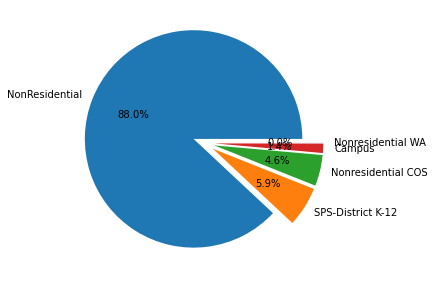

In [63]:
plt.figure(figsize=(10,5))
pieplot(moda(data,'BuildingType'),'BuildingType')

### Description des variables du Dataset créé

In [64]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsInten

#### DataYear
Année d'observation, du relevé :

In [65]:
moda(data,'DataYear')

,DataYear,n,f
0,2016,1668,50.271248
1,2015,1650,49.728752


On remarque qu'on a autant d'observation en 2015 et en 2016, à 18 observations près.

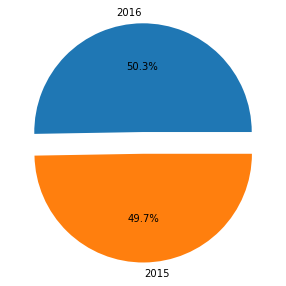

In [66]:
plt.figure(figsize=(10,5))
fig=pieplot(moda(data,'DataYear'),'DataYear')

#### OSEBuildingID
ID d'une "propriété". Observons les propriétés présente dans un seul fichier :
##### Liste des ID de data_2016 absent de data_2015 :

In [67]:
data['OSEBuildingID'][data['DataYear']==2016][data['OSEBuildingID'][data['DataYear']==2016].isin(
    data['OSEBuildingID'][data['DataYear']==2015])==False].values

array(['43', '364', '365', '750', '20377', '20978', '21103', '23964',
       '24418', '49715', '49716', '49967', '49968', '49970', '49972',
       '49979', '49980', '49983', '50026', '50031', '50035', '50037',
       '50039', '50045', '50054', '50062', '50068', '50069', '50070',
       '50081', '50094', '50101', '50196', '50198', '50201', '50204',
       '50207', '50208', '50210', '50212', '50219', '50220', '50221',
       '50222', '50223', '50224', '50225', '50226'], dtype=object)

In [68]:
len(data['OSEBuildingID'][data['DataYear']==2016][data['OSEBuildingID'][data['DataYear']==2016].isin(
    data['OSEBuildingID'][data['DataYear']==2015])==False].values)

48

On observe 48 bâtiment présent dans data_2016 mais absent de data_2015, on va donc voir ceux de data_2015 absent de data_2016

In [69]:
data['OSEBuildingID'][data['DataYear']==2015][data['OSEBuildingID'][data['DataYear']==2015].isin(
    data['OSEBuildingID'][data['DataYear']==2016])==False].values

array(['325', '400', '442', '499', '559', '560', '675', '714', '790',
       '838', '19656', '19658', '19780', '21237', '21471', '21688',
       '21796', '22138', '22441', '22446', '23163', '23848', '24408',
       '24904', '25042', '25455', '25654', '27639', '27829', '49859'],
      dtype=object)

In [70]:
len(data['OSEBuildingID'][data['DataYear']==2015][data['OSEBuildingID'][data['DataYear']==2015].isin(
    data['OSEBuildingID'][data['DataYear']==2016])==False].values)

30

Il y a donc 48+30= 78 bâtiments qui sont présent dans l'un des fichiers mais pas dans l'autre

#### PrimaryPropertyType
L'utilisation principal d'une "propriété" : qui représente plus de 50% de la "propriété".

In [71]:
data['PrimaryPropertyType'].describe()

count                            3318
unique                             30
top       Small- and Mid-Sized Office
freq                              588
Name: PrimaryPropertyType, dtype: object

In [72]:
moda(data,'PrimaryPropertyType')

,PrimaryPropertyType,n,f
0,Small- and Mid-Sized Office,588,17.721519
1,Other,502,15.129596
2,Large Office,344,10.367691
3,K-12 School,275,8.288125
4,Mixed Use Property,220,6.630500
5,Retail Store,191,5.756480
6,Non-Refrigerated Warehouse,187,5.635925
7,Warehouse,187,5.635925
8,Hotel,149,4.490657
9,Worship Facility,143,4.309825


On remarque la présence de modalités contenant un '\n', on va donc uniformiser les modalités :

In [73]:
data['PrimaryPropertyType']=data['PrimaryPropertyType'].replace(to_replace=r'\n$', value='', regex=True)

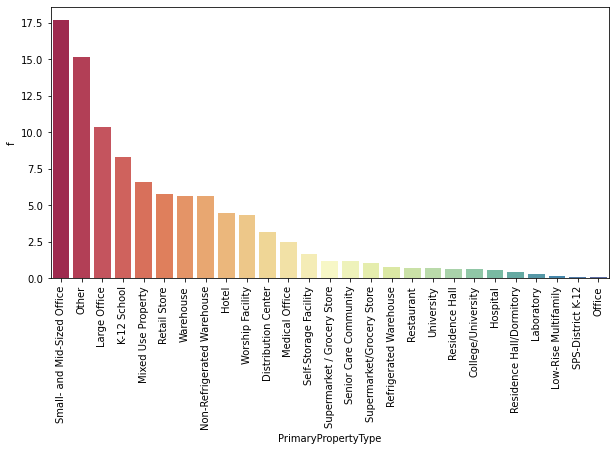

In [74]:
diagbar(moda(data,'PrimaryPropertyType'),'PrimaryPropertyType')

#### PropertyName
Nom officiel ou commun de la propriété, du bâtiment, tel qu'il est saisi dans le Portfolio Manager de l'EPA.

In [75]:
data['PropertyName']=data['PropertyName'].str.upper() #uniformisation des modalités

In [76]:
data['PropertyName'].describe()

count          3318
unique         2840
top       WAREHOUSE
freq             10
Name: PropertyName, dtype: object

In [77]:
moda(data,'PropertyName')

,PropertyName,n,f
0,WAREHOUSE,10,0.301386
1,OFFICE BUILDING,8,0.241109
2,CLOVERDALE BUSINESS PARK,5,0.150693
3,KENYON BUSINESS PARK,3,0.090416
4,RUDD COMPANY,3,0.090416
...,...,...,...
2835,PROPERTY #10,1,0.030139
2836,24943-60S-E,1,0.030139
2837,FISHER BUILDING,1,0.030139
2838,SCHMITZ PARK ELEM SCHOOL (SPS-DISTRICT),1,0.030139


#### TaxParcelIdentificationNumber
ID de la parcelle

In [78]:
data['TaxParcelIdentificationNumber'].describe()

count           3317
unique          1835
top       3224049012
freq              10
Name: TaxParcelIdentificationNumber, dtype: object

In [79]:
data_2016[data_2016['TaxParcelIdentificationNumber']=='3224049012']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,TotalGHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
597,799,2016,NonResidential,Distribution Center,Cloverdale Business Park Building D,309 South Cloverdale Street,Seattle,WA,98108.0,3224049012,1,GREATER DUWAMISH,47.52549,-122.33064,1979,1.0,1.0,54880,0,54880,Distribution Center,Distribution Center,55000.0,NaN,NaN,NaN,NaN,NaN,32.0,50.200001,54.799999,99.900002,104.699997,2763597.00,3013861.500,0.0,363654.1875,1240788.0,15228.089840,1522809.0,No,nan,Compliant,NaN,89.53,1.63
2122,24536,2016,NonResidential,Warehouse,Cloverdale Business Park Building A,309 S Cloverdale Street,Seattle,WA,98108.0,3224049012,1,GREATER DUWAMISH,47.52549,-122.33064,1979,1.0,1.0,31360,0,31360,"Non-Refrigerated Warehouse, Retail Store",Non-Refrigerated Warehouse,29640.0,Retail Store,1460.0,NaN,NaN,NaN,NaN,43.599998,49.099998,87.900002,93.599998,1356972.25,1526335.250,0.0,183531.7031,626210.0,7307.619629,730762.0,No,nan,Compliant,NaN,43.18,1.38
2123,24537,2016,NonResidential,Warehouse,Cloverdale Business Park Building B,309 South Cloverdale Street,Seattle,WA,98108.0,3224049012,1,GREATER DUWAMISH,47.52549,-122.33064,1979,1.0,1.0,33320,0,33320,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,32200.0,Office,1200.0,NaN,NaN,NaN,NaN,70.000000,74.800003,154.199997,159.300003,2339234.00,2499644.750,0.0,377852.5938,1289233.0,10500.010740,1050001.0,No,nan,Compliant,NaN,64.75,1.94
2124,24538,2016,NonResidential,Warehouse,Cloverdale Business Park Building C,309 South Cloverdale Street,Seattle,WA,98108.0,3224049012,1,GREATER DUWAMISH,47.52549,-122.33064,1979,1.0,1.0,48020,0,48020,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,47800.0,NaN,NaN,NaN,NaN,NaN,71.0,49.700001,53.700001,115.599999,119.800003,2373568.25,2567827.750,0.0,425119.5938,1450508.0,9230.599609,923060.0,No,nan,Compliant,NaN,59.14,1.23
2125,24539,2016,NonResidential,Warehouse,Cloverdale Business Park Building E,309 South Cloverdale Street,Seattle,WA,98108.0,3224049012,1,GREATER DUWAMISH,47.52549,-122.33064,1979,1.0,1.0,27420,0,27420,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,27850.0,NaN,NaN,NaN,NaN,NaN,55.0,42.200001,48.099998,82.500000,88.599998,1176342.25,1340563.125,0.0,148811.0000,507743.0,6685.990234,668599.0,No,nan,Compliant,NaN,39.05,1.42


On peut voir qu'une parcelle peut abriter plusieurs bâtiments

#### CouncilDistrictCode
Numéro de l'arrondissement ou se situe la propriété

In [80]:
data['CouncilDistrictCode']=data['CouncilDistrictCode'].astype(str)

In [81]:
moda(data,'CouncilDistrictCode')

,CouncilDistrictCode,n,f
0,7,1062,32.007233
1,2,791,23.839662
2,3,404,12.176010
3,4,332,10.006028
4,5,264,7.956600
5,1,236,7.112719
6,6,229,6.901748


([<matplotlib.patches.Wedge at 0x206e340c460>,
 [Text(0.6427619300176166, 1.0133395784829626, '7'),
  Text(-1.1136956614709486, 0.4468578897376506, '2'),
  Text(-0.8781150588320144, -0.817871593498911, '3'),
  Text(-0.14846083563789123, -1.1907809959357343, '4'),
  Text(0.5114285530187861, -1.0855601481065482, '5'),
  Text(0.9501186608391705, -0.7329901297597271, '1'),
  Text(1.1719025296828622, -0.25815588492790276, '6')],
 [Text(0.374944459176943, 0.5911147541150615, '32.0%'),
  Text(-0.64965580252472, 0.2606671023469629, '23.8%'),
  Text(-0.512233784318675, -0.4770917628743648, '12.2%'),
  Text(-0.08660215412210322, -0.6946222476291783, '10.0%'),
  Text(0.29833332259429185, -0.6332434197288198, '8.0%'),
  Text(0.554235885489516, -0.4275775756931741, '7.1%'),
  Text(0.6836098089816696, -0.15059093287460992, '6.9%')])

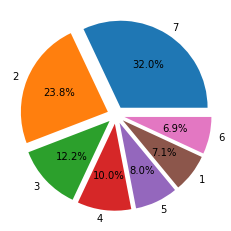

In [82]:
pieplot(moda(data,'CouncilDistrictCode'),'CouncilDistrictCode')

#### Neighborhood
Nom du quartier ou se situe la propriété

In [83]:
data['Neighborhood']=data['Neighborhood'].str.upper()

In [84]:
moda(data, 'Neighborhood')

,Neighborhood,n,f
0,DOWNTOWN,728,21.940928
1,GREATER DUWAMISH,686,20.675105
2,MAGNOLIA / QUEEN ANNE,301,9.071730
3,LAKE UNION,296,8.921037
4,NORTHEAST,243,7.323689
5,EAST,242,7.293550
6,NORTHWEST,174,5.244123
7,BALLARD,139,4.189271
8,NORTH,132,3.978300
9,CENTRAL,110,3.315250


In [85]:
data['Neighborhood'][data['Neighborhood']=='DELRIDGE NEIGHBORHOODS']='DELRIDGE'

<ipython-input-85-745a9167353f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Neighborhood'][data['Neighborhood']=='DELRIDGE NEIGHBORHOODS']='DELRIDGE'


([<matplotlib.patches.Wedge at 0x206e3413220>,
 [Text(0.9260338005641224, 0.7631915881433491, 'DOWNTOWN'),
  Text(-0.5298546055152975, 1.0766866289753154, 'GREATER DUWAMISH'),
  Text(-1.1808370396755188, 0.21359748530906772, 'MAGNOLIA / QUEEN ANNE'),
  Text(-1.1115677105377764, -0.4521252314235583, 'LAKE UNION'),
  Text(-0.7490757411635214, -0.9374889514017333, 'NORTHEAST'),
  Text(-0.25593617021569237, -1.1723893025677625, 'EAST'),
  Text(0.21359749912881004, -1.1808370371757138, 'NORTHWEST'),
  Text(0.5491372469079198, -1.0669809201941667, 'BALLARD'),
  Text(0.8019429931554801, -0.8926855189420458, 'NORTH'),
  Text(0.9837421792329779, -0.6872054458442189, 'CENTRAL'),
  Text(1.0964393328538882, -0.48766872912964254, 'DELRIDGE'),
  Text(1.1643731981481233, -0.29023276078746, 'SOUTHEAST'),
  Text(1.1962963430244977, -0.09420753508193298, 'SOUTHWEST')],
 [Text(0.5401863836624047, 0.44519509308362026, '21.9%'),
  Text(-0.3090818532172569, 0.6280672002356006, '20.7%'),
  Text(-0.6888216064

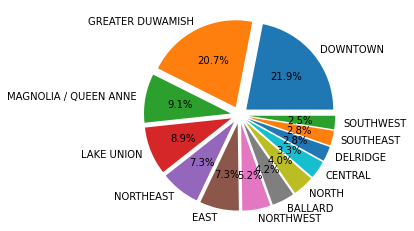

In [86]:
pieplot(moda(data, 'Neighborhood'),'Neighborhood')

#### YearBuilt
Année de construction ou de rénovation complète

In [87]:
data['YearBuilt'].describe()

count    3318.000000
mean     1961.536769
std        32.709772
min      1900.000000
25%      1930.000000
50%      1965.000000
75%      1989.000000
max      2015.000000
Name: YearBuilt, dtype: float64

Text(0.5, 1.0, 'YearBuilt')

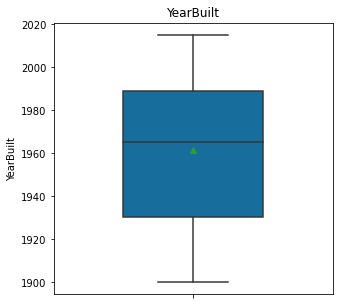

In [88]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='YearBuilt', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("YearBuilt")

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

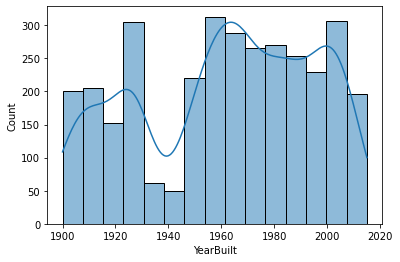

In [89]:
sns.histplot(data=data['YearBuilt'], kde=True)

Sachant que l'on a l'année d'observation et l'année de construction il me semble intérressant de créer une variable 'BuildingAge'qui représente l'âge du bâtiment au moment de l'observation. En effet, plus un bâtiement est récent plus il est censé avoir de bonnes performances énergétique, de plus, nos prédictions doivent pouvoir être effectuée dans le futur sur des bâtiment pas encore construit et pour des années pas encore observée. On ne peut donc pas se baser sur l'année d'observation si on se passe des observations à l'avenir.
#### Création de 'BuildingAge' 

In [90]:
BuildingAge=data['DataYear']-data['YearBuilt']
data.insert(15,'BuildingAge',BuildingAge)

In [91]:
data['BuildingAge'].describe()

count    3318.000000
mean       53.965943
std        32.707800
min         1.000000
25%        27.000000
50%        50.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64

Text(0.5, 1.0, 'BuildingAge')

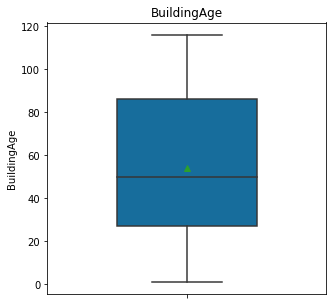

In [92]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='BuildingAge', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("BuildingAge")

<AxesSubplot:xlabel='BuildingAge', ylabel='Count'>

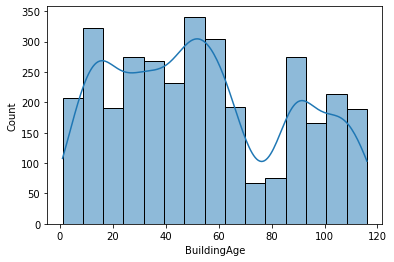

In [93]:
sns.histplot(data=data['BuildingAge'], kde=True)

#### NumberofBuildings
Nombre de bâtiments sur la propriété.

In [94]:
data['NumberofBuildings'].describe()

count    3316.000000
mean        1.117310
std         2.219845
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

On ne peut avoir des propriétés avec 0 bâtiments on valorise donc les "0" par le minimum possible soit "1" :

In [95]:
#data['NumberofBuildings']=data['NumberofBuildings'].apply(lambda x: 1 if x==0 else x)

In [96]:
data['NumberofBuildings'].describe()

count    3316.000000
mean        1.117310
std         2.219845
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

Text(0.5, 1.0, 'NumberofBuildings')

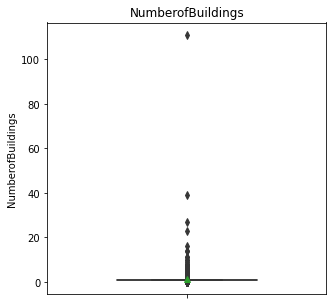

In [97]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='NumberofBuildings', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("NumberofBuildings")

<AxesSubplot:xlabel='NumberofBuildings', ylabel='Count'>

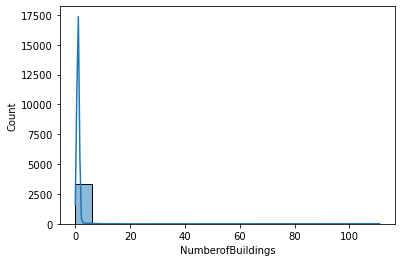

In [98]:
sns.histplot(data=data['NumberofBuildings'],bins=nbinsYule(data['NumberofBuildings']), kde=True)

#### NumberofFloors
Nombre d'étages

In [99]:
data['NumberofFloors'].describe()

count    3310.000000
mean        4.126888
std         6.567333
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

Text(0.5, 1.0, 'NumberofFloors')

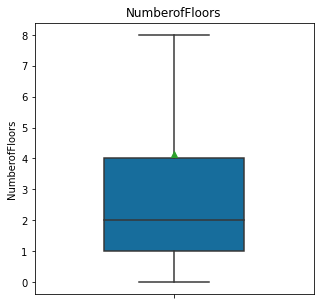

In [100]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='NumberofFloors', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("NumberofFloors")

<AxesSubplot:xlabel='NumberofFloors', ylabel='Count'>

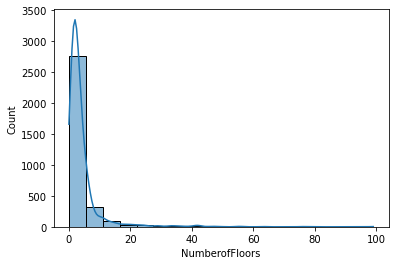

In [101]:
sns.histplot(data=data['NumberofFloors'],bins=nbinsYule(data['NumberofFloors']), kde=True)

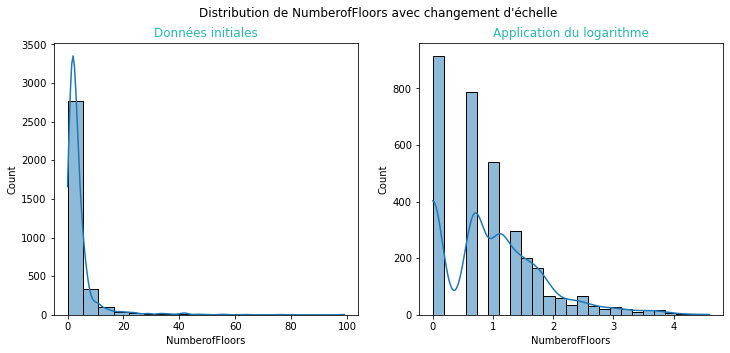

In [102]:
hist_comp(data,'NumberofFloors')

#### PropertyGFATotal
Surface totale de la propriété (Bâtiment+Parking) : GFA = Gross Floor Area, en square feet

In [103]:
data['PropertyGFATotal'].describe()

count    3.318000e+03
mean     1.156672e+05
std      2.511222e+05
min      1.128500e+04
25%      2.951225e+04
50%      4.924600e+04
75%      1.047860e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

Text(0.5, 1.0, 'PropertyGFATotal')

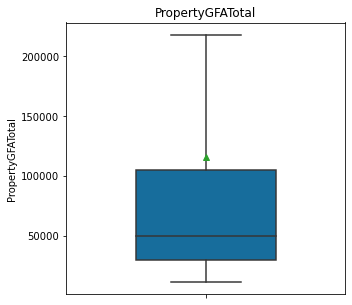

In [104]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='PropertyGFATotal', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("PropertyGFATotal")

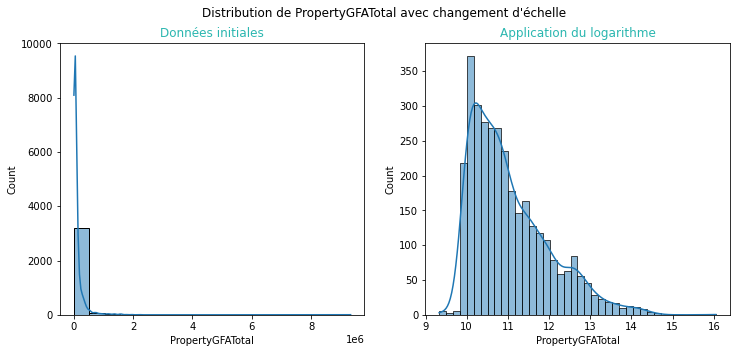

In [105]:
hist_comp(data,'PropertyGFATotal')

On remarque que la transformation par le log() permet de ramener la distribution à une même échelle. On va donc rajouter une variable 'PropertyGFATotal_log'
#### Creation 'PropertyGFATotal_log'

In [106]:
data.insert(19, "PropertyGFATotal_log", np.log(data["PropertyGFATotal"]))

#### PropertyGFAParking
Surface du Parking, en square feet

In [107]:
data['PropertyGFAParking'].describe()

count      3318.000000
mean      13303.304702
std       43596.620504
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

Text(0.5, 1.0, 'PropertyGFAParking')

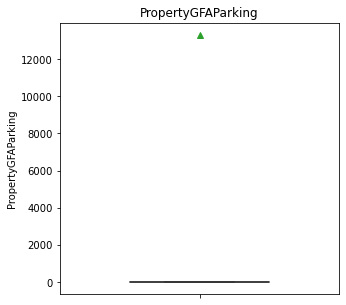

In [108]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='PropertyGFAParking', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("PropertyGFAParking")

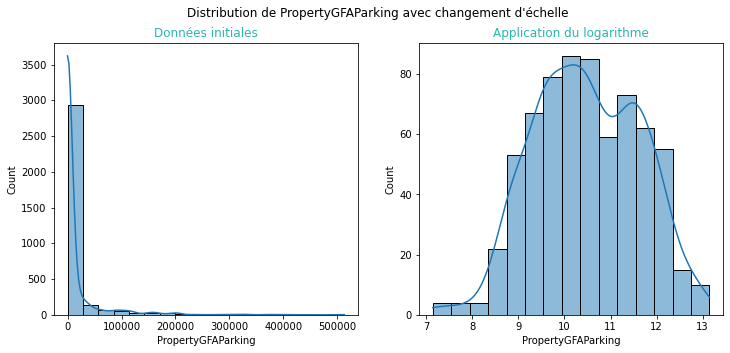

In [109]:
hist_comp(data,'PropertyGFAParking')

Il semble intérressant ici de créer une variable renvoyant la proportion de parking présent sur la propriété. En effet, je pense qu'un parking ne consomme pas d'energie de la même manière qu'un bâtiment. Une propriété avec beaucoup de parking doit donc consommer pas autant d'énergie qu'une propriété avec que du bâtiment.

#### Création de 'ParkingProp'

In [110]:
ParkingProp=data['PropertyGFAParking']/data['PropertyGFATotal']*100
data.insert(21,'ParkingProp',ParkingProp)

In [111]:
data['ParkingProp'].describe()

count    3318.000000
mean        6.268249
std        14.776828
min        -0.002922
25%         0.000000
50%         0.000000
75%         0.000000
max       250.231812
Name: ParkingProp, dtype: float64

On observe que pour certaines propriétés la proportion dépasse 100% ou est inférieure à 0% on va donc mettre à 100% ceux qui dépasse 100% et à 0% ceux qui sont en dessous de 0% :

In [112]:
data['ParkingProp']=data['ParkingProp'].apply(lambda x: 100 if x>100 else x)

In [113]:
data['ParkingProp'].describe()

count    3318.000000
mean        6.198805
std        14.020890
min        -0.002922
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: ParkingProp, dtype: float64

Text(0.5, 1.0, 'ParkingProp')

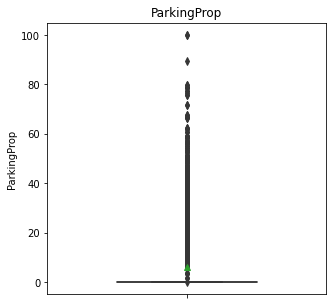

In [114]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='ParkingProp', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("ParkingProp")

<AxesSubplot:xlabel='ParkingProp', ylabel='Count'>

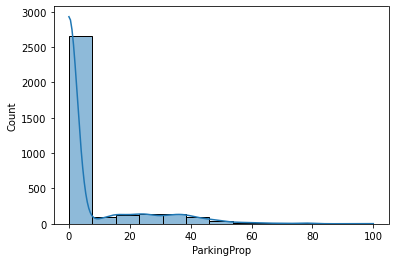

In [115]:
sns.histplot(data=data['ParkingProp'], kde=True)

#### PropertyGFABuilding(s)
Surface du/des bâtiment(s), en square feet

In [116]:
data['PropertyGFABuilding(s)'].describe()

count    3.318000e+03
mean     1.023639e+05
std      2.340749e+05
min     -5.055000e+04
25%      2.850775e+04
50%      4.736800e+04
75%      9.447150e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

In [117]:
idx=data[data['PropertyGFABuilding(s)']<0].index
data = data.drop(idx)

In [118]:
data['PropertyGFABuilding(s)'].describe()

count    3.316000e+03
mean     1.024539e+05
std      2.341167e+05
min      3.636000e+03
25%      2.853100e+04
50%      4.739150e+04
75%      9.447200e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

Text(0.5, 1.0, 'PropertyGFABuilding(s)')

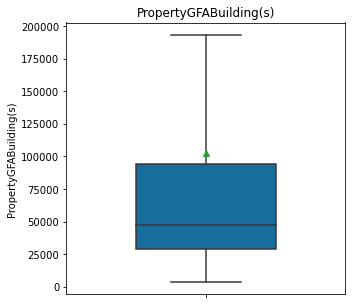

In [119]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='PropertyGFABuilding(s)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("PropertyGFABuilding(s)")

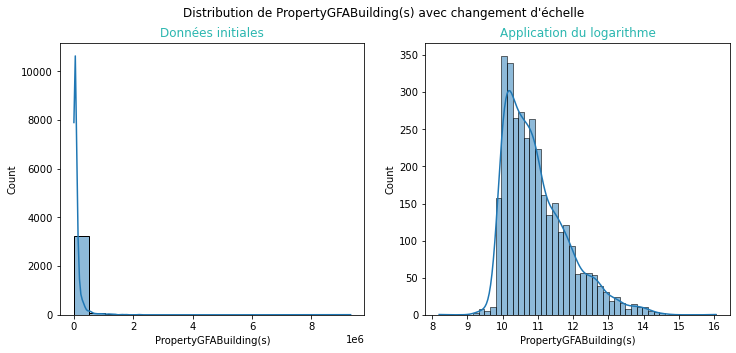

In [120]:
hist_comp(data,'PropertyGFABuilding(s)')

Comme pour la surface de parking on va créer une variable représentant la proportion de bâtiment sur la propriété
#### Création de 'BuildingProp'

In [121]:
BuildingProp=data['PropertyGFABuilding(s)']/data['PropertyGFATotal']*100
data.insert(23,'BuildingProp',BuildingProp)

In [122]:
data['BuildingProp'].describe()

count    3316.000000
mean       93.857770
std        13.834463
min        10.497748
25%       100.000000
50%       100.000000
75%       100.000000
max       100.002922
Name: BuildingProp, dtype: float64

In [123]:
data['BuildingProp']=data['BuildingProp'].apply(lambda x: 100 if x>100 else x)

Text(0.5, 1.0, 'BuildingProp')

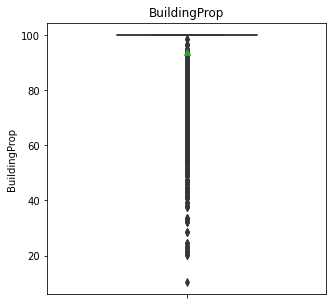

In [124]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='BuildingProp', data=data, width=0.5, palette="colorblind", showfliers=True, showmeans=True)
plot.set_title("BuildingProp")

<AxesSubplot:xlabel='BuildingProp', ylabel='Count'>

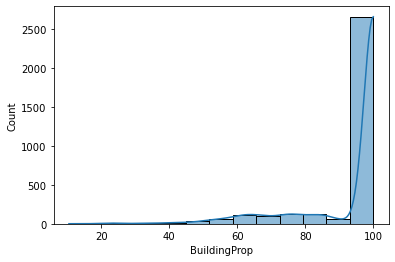

In [125]:
sns.histplot(data=data['BuildingProp'], kde=True)

#### ListOfAllPropertyUseTypes
Liste de tout les "usages" de la propriété

In [126]:
data['ListOfAllPropertyUseTypes']=data['ListOfAllPropertyUseTypes'].str.upper()

In [127]:
data['ListOfAllPropertyUseTypes'].describe()

count       3253
unique       387
top       OFFICE
freq         268
Name: ListOfAllPropertyUseTypes, dtype: object

In [128]:
moda(data,'ListOfAllPropertyUseTypes')

,ListOfAllPropertyUseTypes,n,f
0,OFFICE,268,8.238549
1,K-12 SCHOOL,268,8.238549
2,"OFFICE, PARKING",232,7.131878
3,NON-REFRIGERATED WAREHOUSE,199,6.117430
4,"NON-REFRIGERATED WAREHOUSE, OFFICE",121,3.719643
...,...,...,...
382,"LABORATORY, NON-REFRIGERATED WAREHOUSE, OFFICE...",1,0.030741
383,"DATA CENTER, OFFICE, OTHER, PARKING, RESTAURANT",1,0.030741
384,"NON-REFRIGERATED WAREHOUSE, OFFICE, OTHER - RE...",1,0.030741
385,"BANK BRANCH, RETAIL STORE",1,0.030741


#### LargestPropertyUseType
Usage occupant le plus de place sur la propriété

In [129]:
data['LargestPropertyUseType']=data['LargestPropertyUseType'].str.upper()

In [130]:
data['LargestPropertyUseType'].describe()

count       3245
unique        57
top       OFFICE
freq         974
Name: LargestPropertyUseType, dtype: object

In [131]:
moda(data,'LargestPropertyUseType')

,LargestPropertyUseType,n,f
0,OFFICE,974,30.015408
1,NON-REFRIGERATED WAREHOUSE,393,12.110940
2,K-12 SCHOOL,275,8.474576
3,OTHER,198,6.101695
4,RETAIL STORE,198,6.101695
5,HOTEL,144,4.437596
6,WORSHIP FACILITY,141,4.345146
7,DISTRIBUTION CENTER,106,3.266564
8,MEDICAL OFFICE,84,2.588598
9,SUPERMARKET/GROCERY STORE,78,2.403698


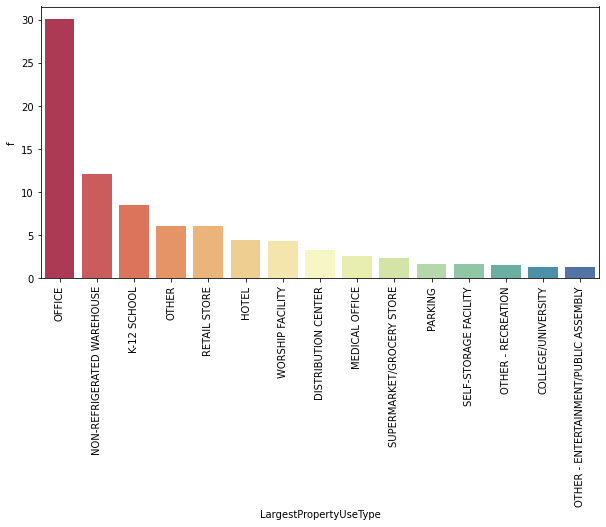

In [132]:
diagbar(moda(data,'LargestPropertyUseType').head(15),'LargestPropertyUseType')

#### LargestPropertyUseTypeGFA
Surface de l'usage le plus grand de la propriété

In [133]:
data['LargestPropertyUseTypeGFA'].describe()

count    3.245000e+03
mean     9.540991e+04
std      2.274962e+05
min      5.656000e+03
25%      2.550000e+04
50%      4.318800e+04
75%      9.000000e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

Text(0.5, 1.0, 'LargestPropertyUseTypeGFA')

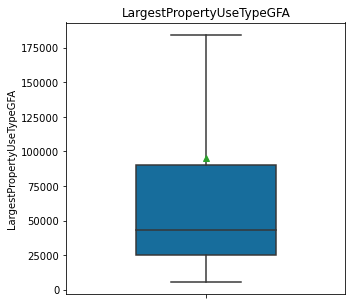

In [134]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='LargestPropertyUseTypeGFA', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("LargestPropertyUseTypeGFA")

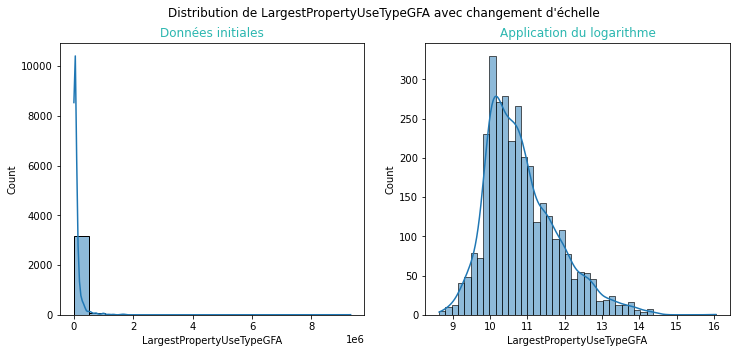

In [135]:
hist_comp(data,'LargestPropertyUseTypeGFA')

On va aussi créer ici une variable représentant la proportion de l'usage le plus grand sur la propriété.
#### Création de 'TopUseTypeProp'

In [136]:
TopUseTypeProp=data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal']*100
data.insert(27,'TopUseTypeProp',TopUseTypeProp)

In [137]:
data['TopUseTypeProp'].describe()

count    3245.000000
mean       86.637872
std        29.676051
min        18.345763
25%        69.084931
50%        96.210593
75%       100.000000
max       642.684902
Name: TopUseTypeProp, dtype: float64

On observe que pour certaines propriétés la proportion dépasse 100%  on va donc mettre à 100% ceux qui dépasse 100% :

In [138]:
data['TopUseTypeProp']=data['TopUseTypeProp'].apply(lambda x: 100 if x>100 else x)

In [139]:
data['TopUseTypeProp'].describe()

count    3245.000000
mean       84.046597
std        20.120732
min        18.345763
25%        69.084931
50%        96.210593
75%       100.000000
max       100.000000
Name: TopUseTypeProp, dtype: float64

<AxesSubplot:xlabel='TopUseTypeProp', ylabel='Count'>

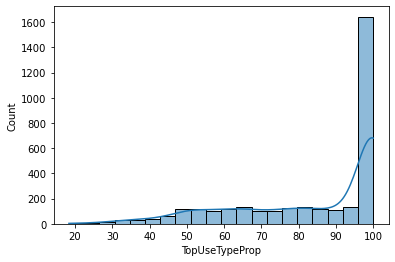

In [140]:
sns.histplot(data=data['TopUseTypeProp'], kde=True)

#### SecondLargestPropertyUseType
Type du second usage le plus grand de la propriété

In [141]:
data['SecondLargestPropertyUseType']=data['SecondLargestPropertyUseType'].str.upper()

In [142]:
data['SecondLargestPropertyUseType'].describe()

count        1666
unique         47
top       PARKING
freq          649
Name: SecondLargestPropertyUseType, dtype: object

In [143]:
moda(data,'SecondLargestPropertyUseType')

,SecondLargestPropertyUseType,n,f
0,PARKING,649,38.955582
1,OFFICE,327,19.627851
2,RETAIL STORE,171,10.264106
3,OTHER,87,5.222089
4,NON-REFRIGERATED WAREHOUSE,62,3.721489
5,RESTAURANT,60,3.601441
6,FITNESS CENTER/HEALTH CLUB/GYM,26,1.560624
7,DATA CENTER,26,1.560624
8,MULTIFAMILY HOUSING,24,1.440576
9,OTHER - SERVICES,22,1.320528


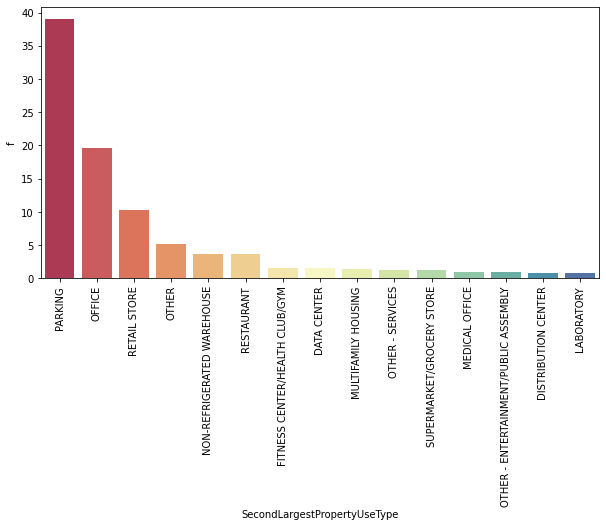

In [144]:
diagbar(moda(data,'SecondLargestPropertyUseType').head(15),'SecondLargestPropertyUseType')

#### SecondLargestPropertyUseTypeGFA
Surface du second usage le plus grand de la propriété

In [145]:
data['SecondLargestPropertyUseTypeGFA'].describe()

count      1666.000000
mean      36142.989374
std       68263.991430
min           0.000000
25%        5400.000000
50%       12102.000000
75%       31033.000000
max      686750.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

Text(0.5, 1.0, 'SecondLargestPropertyUseTypeGFA')

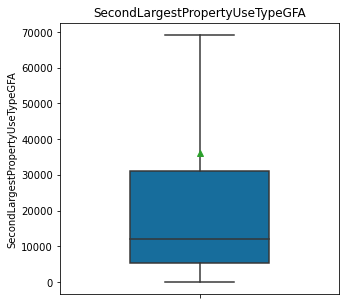

In [146]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SecondLargestPropertyUseTypeGFA', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("SecondLargestPropertyUseTypeGFA")

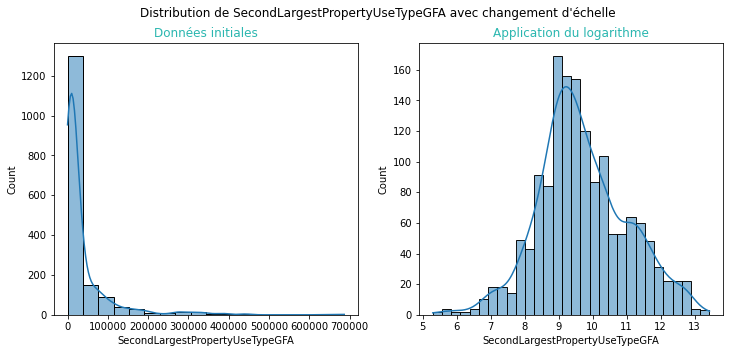

In [147]:
hist_comp(data,'SecondLargestPropertyUseTypeGFA')

#### ThirdLargestPropertyUseType
Type du 3ème usage le plus grand de la propriété

In [148]:
data['ThirdLargestPropertyUseType']=data['ThirdLargestPropertyUseType'].str.upper()

In [149]:
data['ThirdLargestPropertyUseType'].describe()

count        684
unique        40
top       OFFICE
freq          95
Name: ThirdLargestPropertyUseType, dtype: object

In [150]:
moda(data,'ThirdLargestPropertyUseType')

,ThirdLargestPropertyUseType,n,f
0,OFFICE,95,13.888889
1,RETAIL STORE,92,13.450292
2,PARKING,89,13.011696
3,OTHER,82,11.988304
4,RESTAURANT,64,9.356725
5,NON-REFRIGERATED WAREHOUSE,29,4.239766
6,DATA CENTER,24,3.508772
7,MULTIFAMILY HOUSING,22,3.216374
8,SWIMMING POOL,19,2.777778
9,MEDICAL OFFICE,18,2.631579


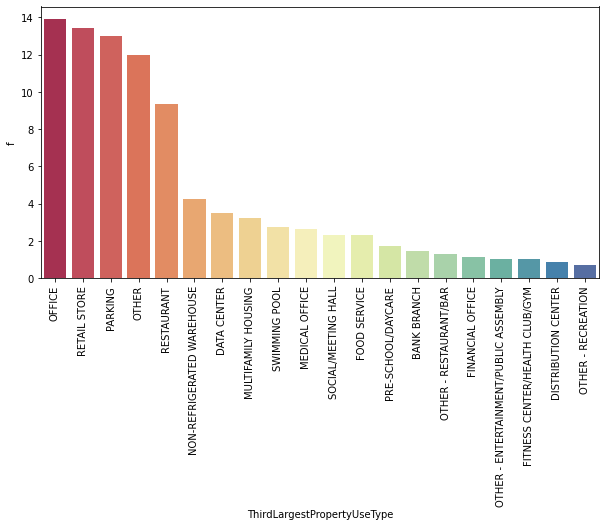

In [151]:
diagbar(moda(data,'ThirdLargestPropertyUseType').head(20),'ThirdLargestPropertyUseType')

#### ThirdLargestPropertyUseTypeGFA
Surface du 3ème usage le plus grand de la propriété

In [152]:
data['ThirdLargestPropertyUseTypeGFA'].describe()

count       684.000000
mean      14059.484501
std       32754.908986
min           0.000000
25%        2626.250000
50%        6000.000000
75%       12400.000000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

Text(0.5, 1.0, 'ThirdLargestPropertyUseTypeGFA')

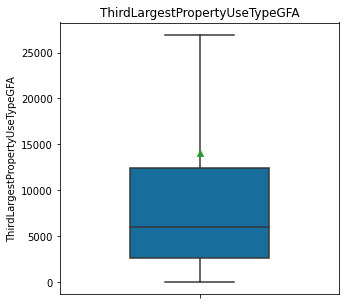

In [153]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='ThirdLargestPropertyUseTypeGFA', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("ThirdLargestPropertyUseTypeGFA")

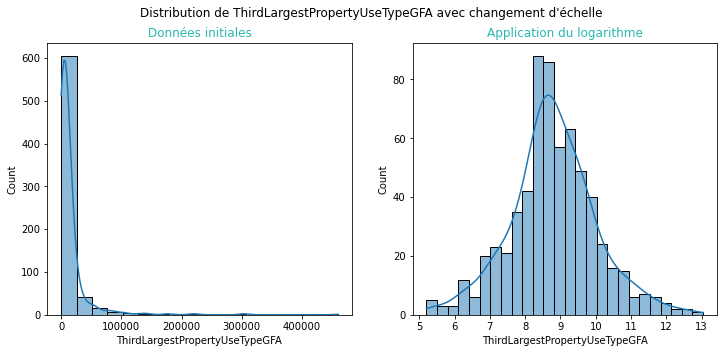

In [154]:
hist_comp(data,'ThirdLargestPropertyUseTypeGFA')

#### YearsENERGYSTARCertified
Années pour laquelle la propriété a reçue la certification ENRGY STAR

In [155]:
data['YearsENERGYSTARCertified'].describe()

count      188
unique     113
top       2016
freq        26
Name: YearsENERGYSTARCertified, dtype: object

In [156]:
moda(data,'YearsENERGYSTARCertified')

,YearsENERGYSTARCertified,n,f
0,2016,26,13.829787
1,2009,8,4.255319
2,2013,7,3.723404
3,2017,6,3.191489
4,"2016, 2015",6,3.191489
5,2014,4,2.127660
6,"2016,2015",4,2.127660
7,2010,4,2.127660
8,2011,3,1.595745
9,"2017,2015",3,1.595745


#### ENERGYSTARScore
An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.

In [157]:
data['ENERGYSTARScore'].describe()

count    2210.000000
mean       64.815837
std        28.556347
min         1.000000
25%        47.000000
50%        72.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [158]:
nbNaCol(data, 'ENERGYSTARScore')

(1106, 33.35343787696019)

Text(0.5, 1.0, 'ENERGYSTARScore')

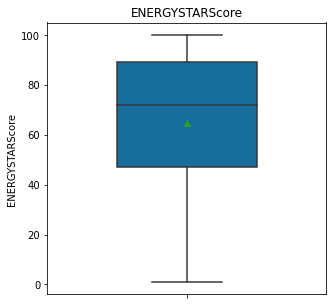

In [159]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='ENERGYSTARScore', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title("ENERGYSTARScore")

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Count'>

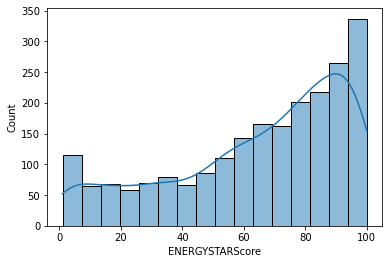

In [160]:
sns.histplot(data=data['ENERGYSTARScore'],kde=True)

#### SiteEUI(kBtu/sf)
Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.

In [161]:
data['SiteEUI(kBtu/sf)'].describe()

count    3306.000000
mean       71.621537
std        72.391242
min         0.000000
25%        33.200000
50%        51.700000
75%        81.699997
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

In [162]:
nbNaCol(data, 'SiteEUI(kBtu/sf)')

(10, 0.30156815440289503)

Text(0.5, 1.0, 'SiteEUI(kBtu/sf)')

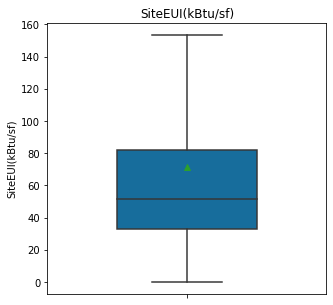

In [163]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SiteEUI(kBtu/sf)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SiteEUI(kBtu/sf)')

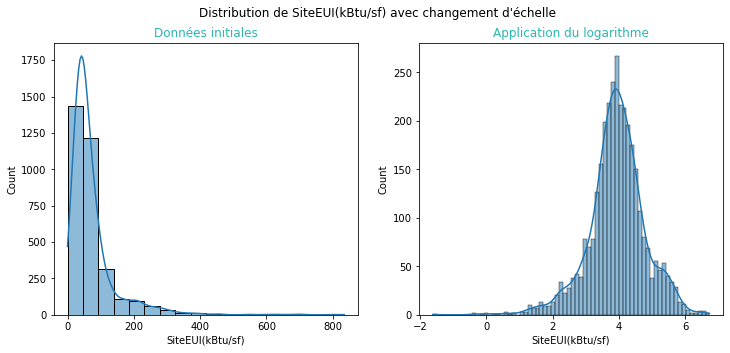

In [164]:
hist_comp(data,'SiteEUI(kBtu/sf)')

#### SiteEUIWN(kBtu/sf)
Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

In [165]:
data['SiteEUIWN(kBtu/sf)'].describe()

count    3306.000000
mean       74.848125
std        73.848330
min         0.000000
25%        35.900000
50%        54.799999
75%        86.174998
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: float64

Text(0.5, 1.0, 'SiteEUIWN(kBtu/sf)')

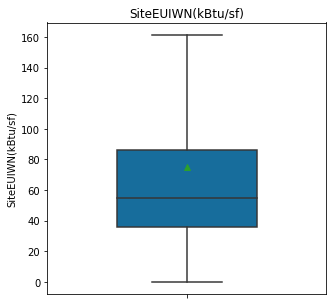

In [166]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SiteEUIWN(kBtu/sf)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SiteEUIWN(kBtu/sf)')

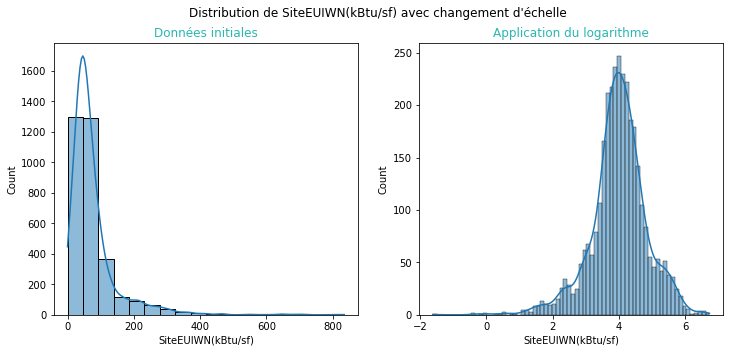

In [167]:
hist_comp(data,'SiteEUIWN(kBtu/sf)')

#### SourceEUI(kBtu/sf)
Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

In [168]:
data['SourceEUI(kBtu/sf)'].describe()

count    3307.000000
mean      175.451527
std       180.837823
min        -2.000000
25%        76.200000
50%       131.300003
75%       205.099998
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64

Text(0.5, 1.0, 'SourceEUI(kBtu/sf)')

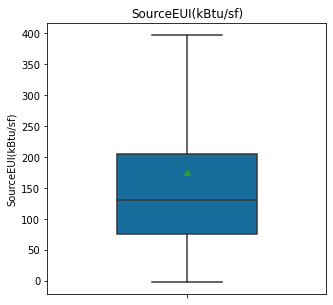

In [169]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SourceEUI(kBtu/sf)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SourceEUI(kBtu/sf)')

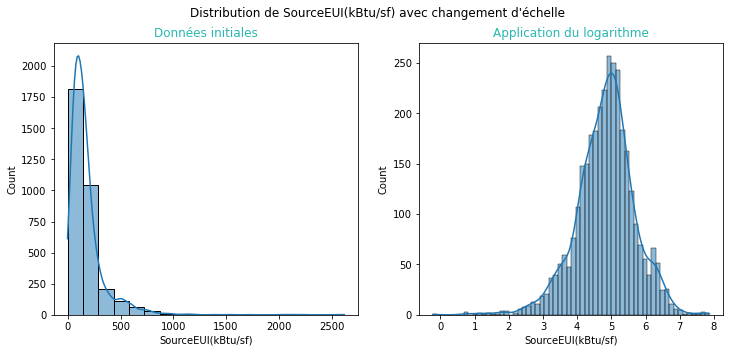

In [170]:
hist_comp(data,'SourceEUI(kBtu/sf)')

#### SourceEUIWN(kBtu/sf)
Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

In [171]:
data['SourceEUIWN(kBtu/sf)'].describe()

count    3307.000000
mean      178.669187
std       180.684146
min        -2.100000
25%        80.750000
50%       134.800003
75%       207.800003
max      2620.000000
Name: SourceEUIWN(kBtu/sf), dtype: float64

Text(0.5, 1.0, 'SourceEUIWN(kBtu/sf)')

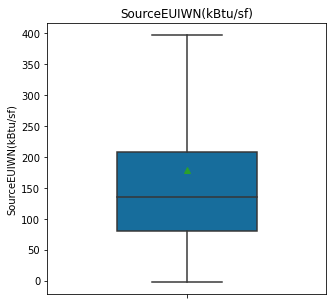

In [172]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SourceEUIWN(kBtu/sf)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SourceEUIWN(kBtu/sf)')

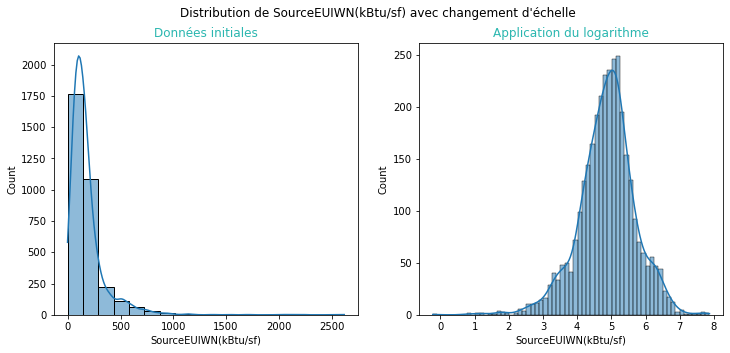

In [173]:
hist_comp(data,'SourceEUIWN(kBtu/sf)')

#### SiteEnergyUse(kBtu)
The annual amount of energy consumed by the property from all sources of energy. Cette variable est l'une des variable que l'on va devoir prédire. 

In [174]:
data['SiteEnergyUse(kBtu)'].describe()

count    3.307000e+03
mean     8.072040e+06
std      2.526186e+07
min      0.000000e+00
25%      1.223360e+06
50%      2.505271e+06
75%      6.917379e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [175]:
nbNaCol(data, 'SiteEnergyUse(kBtu)')

(9, 0.27141133896260555)

Il y a 9 individus qui présentent des données manquantes pour cette variable. Hors cette variable étant une de nos targets on ne peut pas lui imputer une valeur tel que la moyenne ou la médiane, on va donc retirer les individus présentant des données manquantes pour cette variable. On considère aussi "0" comme une donnée manquante.

In [176]:
idx=data[data['SiteEnergyUse(kBtu)'].isna() | (data['SiteEnergyUse(kBtu)']<=0)].index
data = data.drop(idx)

In [177]:
data['SiteEnergyUse(kBtu)'].describe()

count    3.289000e+03
mean     8.116216e+06
std      2.532383e+07
min      1.144100e+04
25%      1.241432e+06
50%      2.539565e+06
75%      6.963616e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Text(0.5, 1.0, 'SiteEnergyUse(kBtu)')

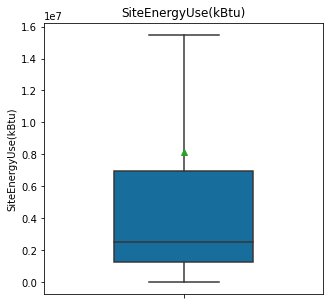

In [178]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SiteEnergyUse(kBtu)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SiteEnergyUse(kBtu)')

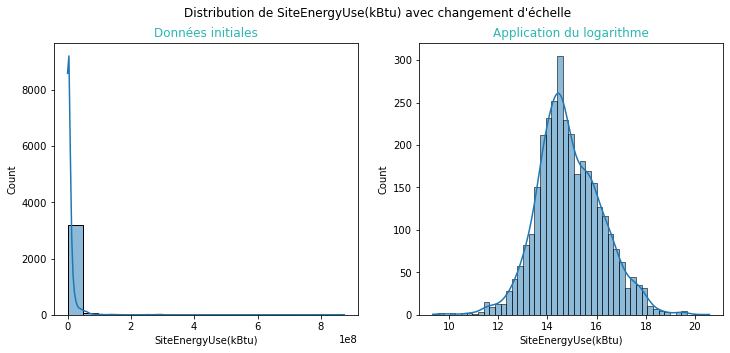

In [179]:
hist_comp(data,'SiteEnergyUse(kBtu)')

#### SiteEnergyUseWN(kBtu)
The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.

In [180]:
data['SiteEnergyUseWN(kBtu)'].describe()

count    3.288000e+03
mean     8.038203e+06
std      2.074032e+07
min      0.000000e+00
25%      1.343068e+06
50%      2.707758e+06
75%      7.217921e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

Text(0.5, 1.0, 'SiteEnergyUseWN(kBtu)')

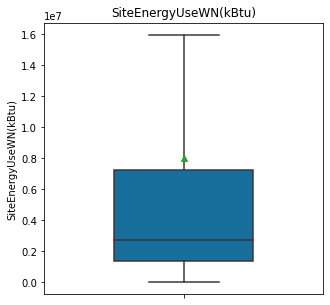

In [181]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SiteEnergyUseWN(kBtu)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SiteEnergyUseWN(kBtu)')

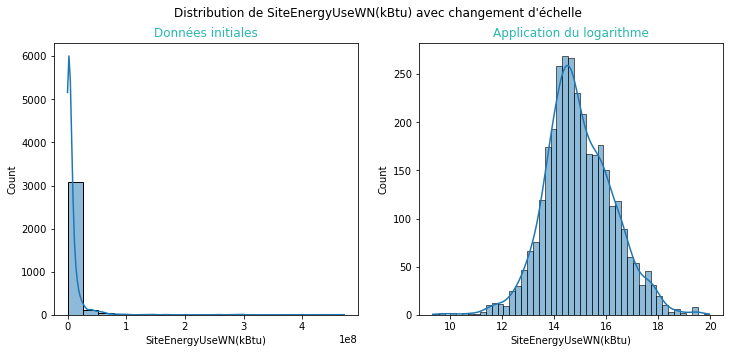

In [182]:
hist_comp(data,'SiteEnergyUseWN(kBtu)')

#### SteamUse(kBtu)
The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).

In [183]:
data['SteamUse(kBtu)'].describe()

count    3.289000e+03
mean     4.964037e+05
std      5.242408e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64

Text(0.5, 1.0, 'SteamUse(kBtu)')

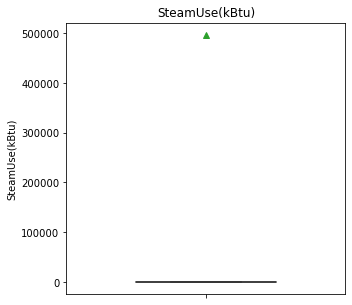

In [184]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='SteamUse(kBtu)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('SteamUse(kBtu)')

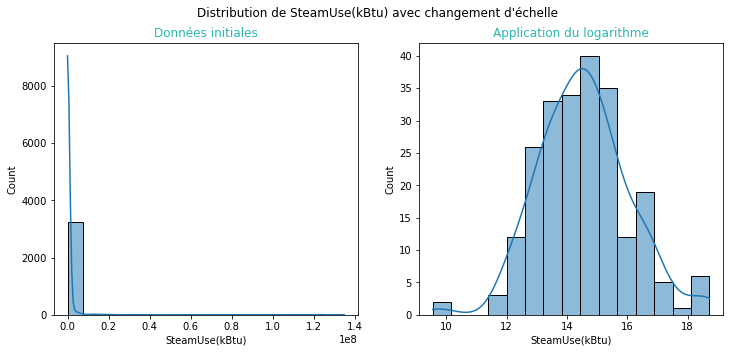

In [185]:
hist_comp(data,'SteamUse(kBtu)')

#### Electricity(kWh)
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

In [186]:
data['Electricity(kWh)'].describe()

count    3.289000e+03
mean     1.660524e+06
std      5.116477e+06
min     -3.382680e+04
25%      2.131750e+05
50%      4.786946e+05
75%      1.434702e+06
max      1.925775e+08
Name: Electricity(kWh), dtype: float64

Text(0.5, 1.0, 'Electricity(kWh)')

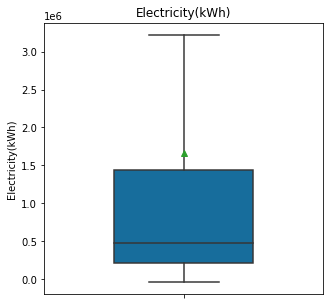

In [187]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='Electricity(kWh)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('Electricity(kWh)')

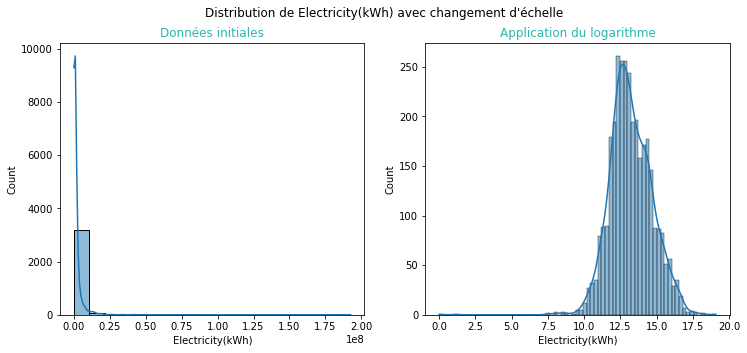

In [188]:
hist_comp(data,'Electricity(kWh)')

#### Electricity(kBtu)
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

In [189]:
data['Electricity(kBtu)'].describe()

count    3.289000e+03
mean     5.665819e+06
std      1.745762e+07
min     -1.154170e+05
25%      7.273820e+05
50%      1.633306e+06
75%      4.895406e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

Text(0.5, 1.0, 'Electricity(kWh)')

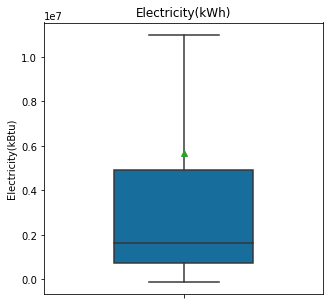

In [190]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='Electricity(kBtu)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('Electricity(kWh)')

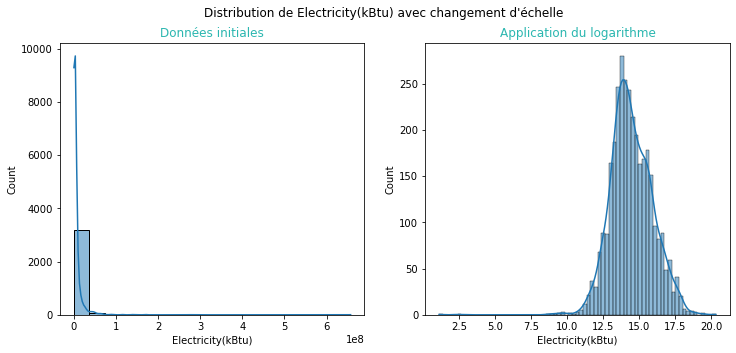

In [191]:
hist_comp(data,'Electricity(kBtu)')

#### NaturalGas(therms)
The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

In [192]:
data['NaturalGas(therms)'].describe()

count    3.289000e+03
mean     1.883798e+04
std      7.920935e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.887000e+03
75%      1.475252e+04
max      2.979090e+06
Name: NaturalGas(therms), dtype: float64

Text(0.5, 1.0, 'NaturalGas(therms)')

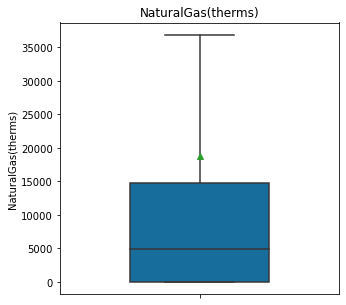

In [193]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='NaturalGas(therms)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('NaturalGas(therms)')

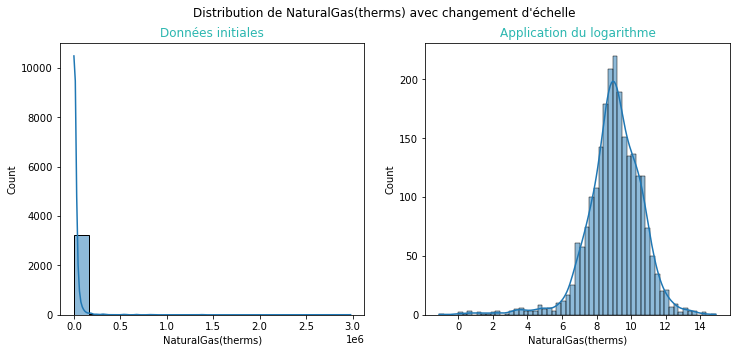

In [194]:
hist_comp(data,'NaturalGas(therms)')

#### NaturalGas(kBtu)
The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

In [195]:
data['NaturalGas(kBtu)'].describe()

count    3.289000e+03
mean     1.883798e+06
std      7.920935e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.887000e+05
75%      1.475252e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

Text(0.5, 1.0, 'NaturalGas(kBtu)')

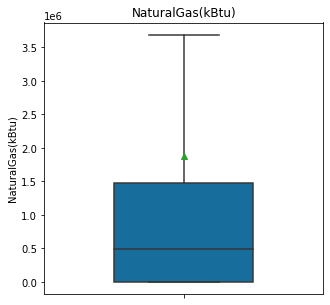

In [196]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='NaturalGas(kBtu)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('NaturalGas(kBtu)')

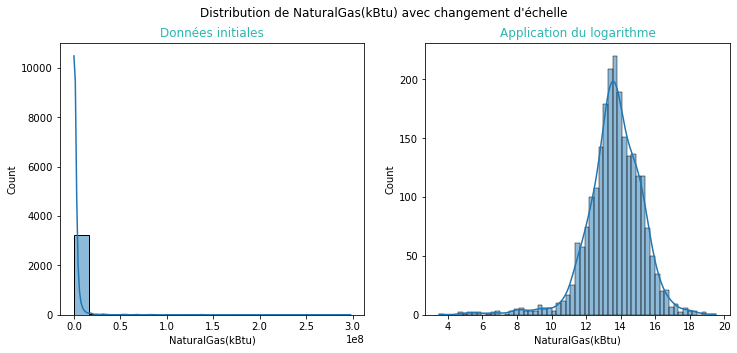

In [197]:
hist_comp(data,'NaturalGas(kBtu)')

#### TotalGHGEmissions(MetricTonsCO2e)
Emissions totale de CO2. Cette variable est la seconde variable que l'on doit prédire.

In [198]:
data['TotalGHGEmissions(MetricTonsCO2e)'].describe()

count     3289.000000
mean       177.862788
std        668.354508
min         -0.800000
25%         19.890000
50%         49.280000
75%        139.210000
max      16870.980000
Name: TotalGHGEmissions(MetricTonsCO2e), dtype: float64

In [199]:
nbNaCol(data,'TotalGHGEmissions(MetricTonsCO2e)')

(0, 0.0)

Comme pour la 1ere target on va retirer du dataset les valeurs manquantes et abérantes :

In [200]:
idx=data[data['TotalGHGEmissions(MetricTonsCO2e)'].isna() | (data['TotalGHGEmissions(MetricTonsCO2e)']<=0)].index
data = data.drop(idx)

In [201]:
data['TotalGHGEmissions(MetricTonsCO2e)'].describe()

count     3287.000000
mean       177.971253
std        668.543398
min          0.080000
25%         19.940000
50%         49.280000
75%        139.225000
max      16870.980000
Name: TotalGHGEmissions(MetricTonsCO2e), dtype: float64

Text(0.5, 1.0, 'TotalGHGEmissions(MetricTonsCO2e)')

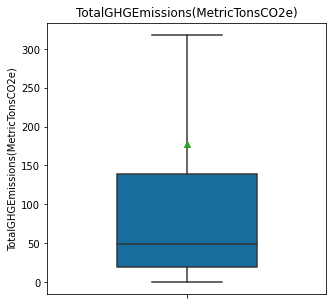

In [202]:
plt.figure(figsize=(5,5))
plot=sns.boxplot(y='TotalGHGEmissions(MetricTonsCO2e)', data=data, width=0.5, palette="colorblind", showfliers=False, showmeans=True)
plot.set_title('TotalGHGEmissions(MetricTonsCO2e)')

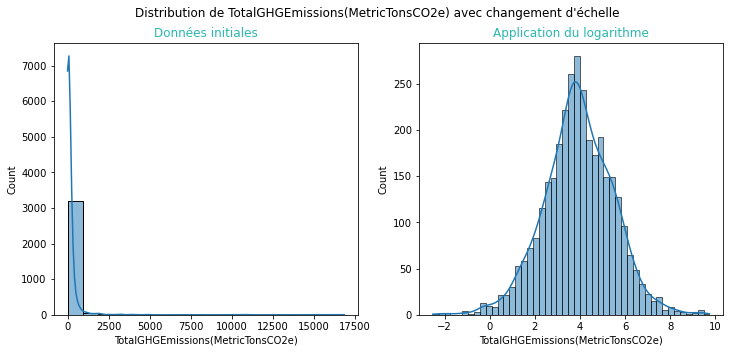

In [203]:
hist_comp(data,'TotalGHGEmissions(MetricTonsCO2e)')

#### DefaultData
The property used default data for at least one property characteristic.

In [204]:
data['DefaultData'].describe()

count     3287
unique       2
top         No
freq      3012
Name: DefaultData, dtype: object

([<matplotlib.patches.Wedge at 0x206e51e3ac0>,
 [Text(-1.158788777364886, 0.31178288832646517, 'No'),
  Text(1.1587887627692743, -0.31178294257328265, 'Yes')],
 [Text(-0.6759601201295167, 0.18187335152377135, '91.6%'),
  Text(0.6759601116154099, -0.18187338316774818, '8.4%')])

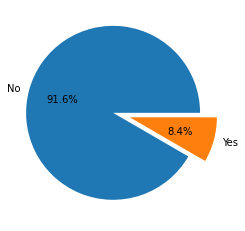

In [205]:
pieplot(moda(data, 'DefaultData'),'DefaultData')

#### ComplianceStatus
Whether a property has met energy benchmarking requirements for the current reporting year.

In [206]:
data['ComplianceStatus'].describe()

count          3287
unique            3
top       Compliant
freq           3185
Name: ComplianceStatus, dtype: object

In [207]:
moda(data, 'ComplianceStatus')

,ComplianceStatus,n,f
0,Compliant,3185,96.896866
1,Error - Correct Default Data,87,2.646790
2,Not Compliant,15,0.456343


([<matplotlib.patches.Wedge at 0x206e3342a90>,
 [Text(-1.194302199384127, 0.11680007083147254, 'Compliant'),
  Text(1.192505037372777, -0.1339094314846872, 'Error - Correct Default Data'),
  Text(1.1998766847119715, -0.01720294988100562, 'Not Compliant')],
 [Text(-0.696676282974074, 0.06813337465169231, '96.9%'),
  Text(0.6956279384674531, -0.07811383503273418, '2.6%'),
  Text(0.6999280660819833, -0.01003505409725328, '0.5%')])

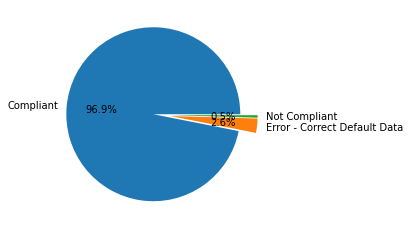

In [208]:
pieplot(moda(data, 'ComplianceStatus'),'ComplianceStatus')

#### Outlier
Whether a property is a high or low outlier

In [209]:
data['Outlier']=data['Outlier'].str.title()

In [210]:
data['Outlier'].describe()

count              46
unique              2
top       Low Outlier
freq               30
Name: Outlier, dtype: object

([<matplotlib.patches.Wedge at 0x206e3c4f370>,
 [Text(-0.552078123347119, 1.06546222163037, 'Low Outlier'),
  Text(0.552078223102889, -1.065462169941081, 'High Outlier')],
 [Text(-0.3220455719524861, 0.6215196292843823, '65.2%'),
  Text(0.3220456301433519, -0.6215195991322972, '34.8%')])

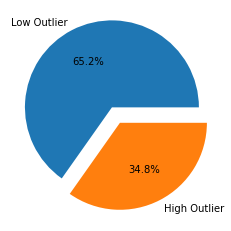

In [211]:
pieplot(moda(data, 'Outlier'),'Outlier')

### Création du fichier de travail
On vient donc de nettoyer notre fichier de travail, on peut donc maintenant l'exporter pour pouvoir entrainer nos modèles dessus :

In [214]:
data.to_csv('Data\data.csv', index = False)